In [2]:
# !pip install db-dtypes
# !pip uninstall numpy
# !pip uninstall pandas
# !pip install google-cloud-bigquery
# !pip install statsmodels
# !pip install matplotlib
# !pip install seaborn
# !pip install db-dtypes

### Libraries
We import necessary libraries for data manipulation and visualization.

### Label Proportion
We examine churn distribution overall and by month.

### Violin Plots
We use violin plots to compare churn and non-churn customers by feature.

### Findings
Customers with more transactions, lower promo to GMV ratio, lower monthly average cancelled transactions, longer terms, and a diverse range of product purchases are less likely to churn. Note that while these plots provide initial insights, further analysis is needed for accurate churn prediction.

# Import Library

In [3]:
import os
from dotenv import load_dotenv

In [4]:
from google.cloud import bigquery
from google.oauth2 import service_account
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from config import credential_datamart, project_id_bq, churn_bq_db, churn_feature_table 
from module.utils import memory_usage, read_file, binary_label_summary

In [6]:
credentials = service_account.Credentials.from_service_account_file(
    credential_datamart, scopes = ["https://www.googleapis.com/auth/cloud-platform"],
)
bq_client = bigquery.Client(project = project_id_bq, credentials = credentials)

## fetch data

In [7]:
query = """
SELECT  *
FROM
 `{project_id_bq}.{churn_bq_db}.{churn_feature_table}`
WHERE date between "2022-01-01" and "2022-06-30"
""".format(project_id_bq = project_id_bq, churn_bq_db = churn_bq_db, churn_feature_table = churn_feature_table)

df = bq_client.query(query).to_dataframe()



In [8]:
read_file(df)

SHAPE (1306, 41)
MISSING VALUES
                            column total_row_missing missing_value_rate
0               SUM_GMV_last30days               243             18.61%
1            SUM_GMV_last30_60days               278             21.29%
2            SUM_GMV_last60_90days               277             21.21%
3             SUM_PROMO_last30days               243             18.61%
4          SUM_PROMO_last30_60days               278             21.29%
5          SUM_PROMO_last60_90days               277             21.21%
6      SUM_PRDTRX_PROMO_last30days               248             18.99%
7   SUM_PRDTRX_PROMO_last30_60days               284             21.75%
8   SUM_PRDTRX_PROMO_last60_90days               283             21.67%
9           PROMO_ratio_last30days               243             18.61%
10       PROMO_ratio_last30_60days               278             21.29%
11       PROMO_ratio_last60_90days               277             21.21%
12              SUM_TRX_last30da

In [9]:
memory_usage()

,Size
__builtins__,9.09KB
datetime,416.00B
__file__,219.00B
timer,136.00B
binary_label_summary,136.00B
memory_usage,136.00B
obj_size_fmt,136.00B
read_file,136.00B
__cached__,129.00B
gc,72.00B


In [10]:
df.to_csv("data_full.csv",index = False)

In [11]:
# # as there's a bug preventing the filling or replacement of null values, these functions serve as a workaround.
def convert_nan_to_zero(df):
    for column in df.columns:
        for index, value in df[column].items():
            if pd.isna(value):
                df.at[index, column] = 0
    return df

In [12]:
df=convert_nan_to_zero(df)

In [13]:
[i for i in df[df.columns].select_dtypes(include=object).columns]

['customer_id']

In [14]:
df[["SUM_GMV_last30days",
 "SUM_GMV_last30_60days",
 "SUM_GMV_last60_90days",
 "SUM_PROMO_last30days",
 "SUM_PROMO_last30_60days",
 "SUM_PROMO_last60_90days",
 "SUM_PRDTRX_PROMO_last30days",
 "SUM_PRDTRX_PROMO_last30_60days",
 "SUM_PRDTRX_PROMO_last60_90days",
 "SUM_PRDTRX_last30days",
 "SUM_PRDTRX_last30_60days",
 "SUM_PRDTRX_last60_90days",
 "PROMO_ratio_last30days",
 "PROMO_ratio_last30_60days",
 "PROMO_ratio_last60_90days",
 "SUM_PROMO_last90",
 "SUM_GMV_last90",
 "SUM_TRX_last30days",
 "SUM_TRX_last30_60days",
 "SUM_TRX_last60_90days",
 "SUM_UNIQ_PROD_last30days",
 "SUM_UNIQ_PROD_last30_60days",
 "SUM_UNIQ_PROD_last60_90days",
 "SUM_CNCL_TRX_last30days",
 "SUM_CNCL_TRX_last30_60days",
 "SUM_CNCL_TRX_last60_90days",
 "SUM_TRX_last90",
 "SUM_UNIQ_PROD_last90",
 "SUM_CNCL_TRX_last90",
 "GMV_to_TRX_30",
 "GMV_to_TRX_60",
 "GMV_to_TRX_90",
 "AVG_GMV_MONTHLY",
 "AVG_PROMO_MONTHLY",
 "AVG_UNIQ_PROD_MONTHLY",
 "AVG_CNCL_TRX_MONTHLY"]]=df[["SUM_GMV_last30days",
 "SUM_GMV_last30_60days",
 "SUM_GMV_last60_90days",
 "SUM_PROMO_last30days",
 "SUM_PROMO_last30_60days",
 "SUM_PROMO_last60_90days",
 "SUM_PRDTRX_PROMO_last30days",
 "SUM_PRDTRX_PROMO_last30_60days",
 "SUM_PRDTRX_PROMO_last60_90days",
 "SUM_PRDTRX_last30days",
 "SUM_PRDTRX_last30_60days",
 "SUM_PRDTRX_last60_90days",
 "PROMO_ratio_last30days",
 "PROMO_ratio_last30_60days",
 "PROMO_ratio_last60_90days",
 "SUM_PROMO_last90",
 "SUM_GMV_last90",
 "SUM_TRX_last30days",
 "SUM_TRX_last30_60days",
 "SUM_TRX_last60_90days",
 "SUM_UNIQ_PROD_last30days",
 "SUM_UNIQ_PROD_last30_60days",
 "SUM_UNIQ_PROD_last60_90days",
 "SUM_CNCL_TRX_last30days",
 "SUM_CNCL_TRX_last30_60days",
 "SUM_CNCL_TRX_last60_90days",
 "SUM_TRX_last90",
 "SUM_UNIQ_PROD_last90",
 "SUM_CNCL_TRX_last90",
 "GMV_to_TRX_30",
 "GMV_to_TRX_60",
 "GMV_to_TRX_90",
 "AVG_GMV_MONTHLY",
 "AVG_PROMO_MONTHLY",
 "AVG_UNIQ_PROD_MONTHLY",
 "AVG_CNCL_TRX_MONTHLY"]].astype(float)

In [15]:
col_target="is_churned"
# col_categorical=
col_list = list(df.drop(col_target, axis=1).columns)
col_numerical = list(df[col_list].select_dtypes(include=np.number).columns)

## calculate label porpotion

In [16]:
binary_label_summary(df, col_target)

,Label,Count,Ratio
0,Churn,223,0.17075
1,Non-Churn,1083,0.82925


In [17]:
df["month"] = pd.to_datetime(df["date"]).dt.to_period("M")

In [18]:
def label_proportion_table(df, month_column, label_column):
    # Group by month and label, and count occurrences
    label_counts = df.groupby([month_column, label_column]).size().unstack(fill_value=0)
    
    # Calculate ratio by month
    label_counts["total"] = label_counts.sum(axis=1)
    label_counts["churn rate"] = label_counts[1] / label_counts["total"]
    
    # Calculate overall ratio
    total_churn = label_counts[1].sum()
    total_non_churn = label_counts[0].sum()
    total_samples = total_churn + total_non_churn
    label_counts.loc["overall ratio"] = [total_churn, total_non_churn, total_samples, total_churn / total_samples]
    return label_counts

In [19]:
label_proportion_table(df, "month",col_target)

is_churned,0,1,total,churn rate
month,,,,
2022-01,171.0,34.0,205.0,0.165854
2022-02,176.0,33.0,209.0,0.157895
2022-03,172.0,38.0,210.0,0.180952
2022-04,216.0,42.0,258.0,0.162791
2022-05,168.0,35.0,203.0,0.172414
2022-06,180.0,41.0,221.0,0.185520
overall ratio,223.0,1083.0,1306.0,0.170750


## distribution between churn&non churn by each feature

In [20]:
def violin_(df, col_numerical, col_target):
    num_plots = len(col_numerical)
    num_cols = 3
    num_rows = num_plots  // num_cols
    if num_plots % num_cols>0:
        num_rows+=1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(col_numerical):
        data_new = df.dropna(subset=[col, col_target])
        ax = sns.violinplot(data=data_new, x=col_target, y=col, hue=col_target, ax=axes[i])
        ax.set_xlabel(col_target)
        ax.set_ylabel(col)
        ax.legend(title=col_target, loc="best")
    
    # Turn off extra subplots
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

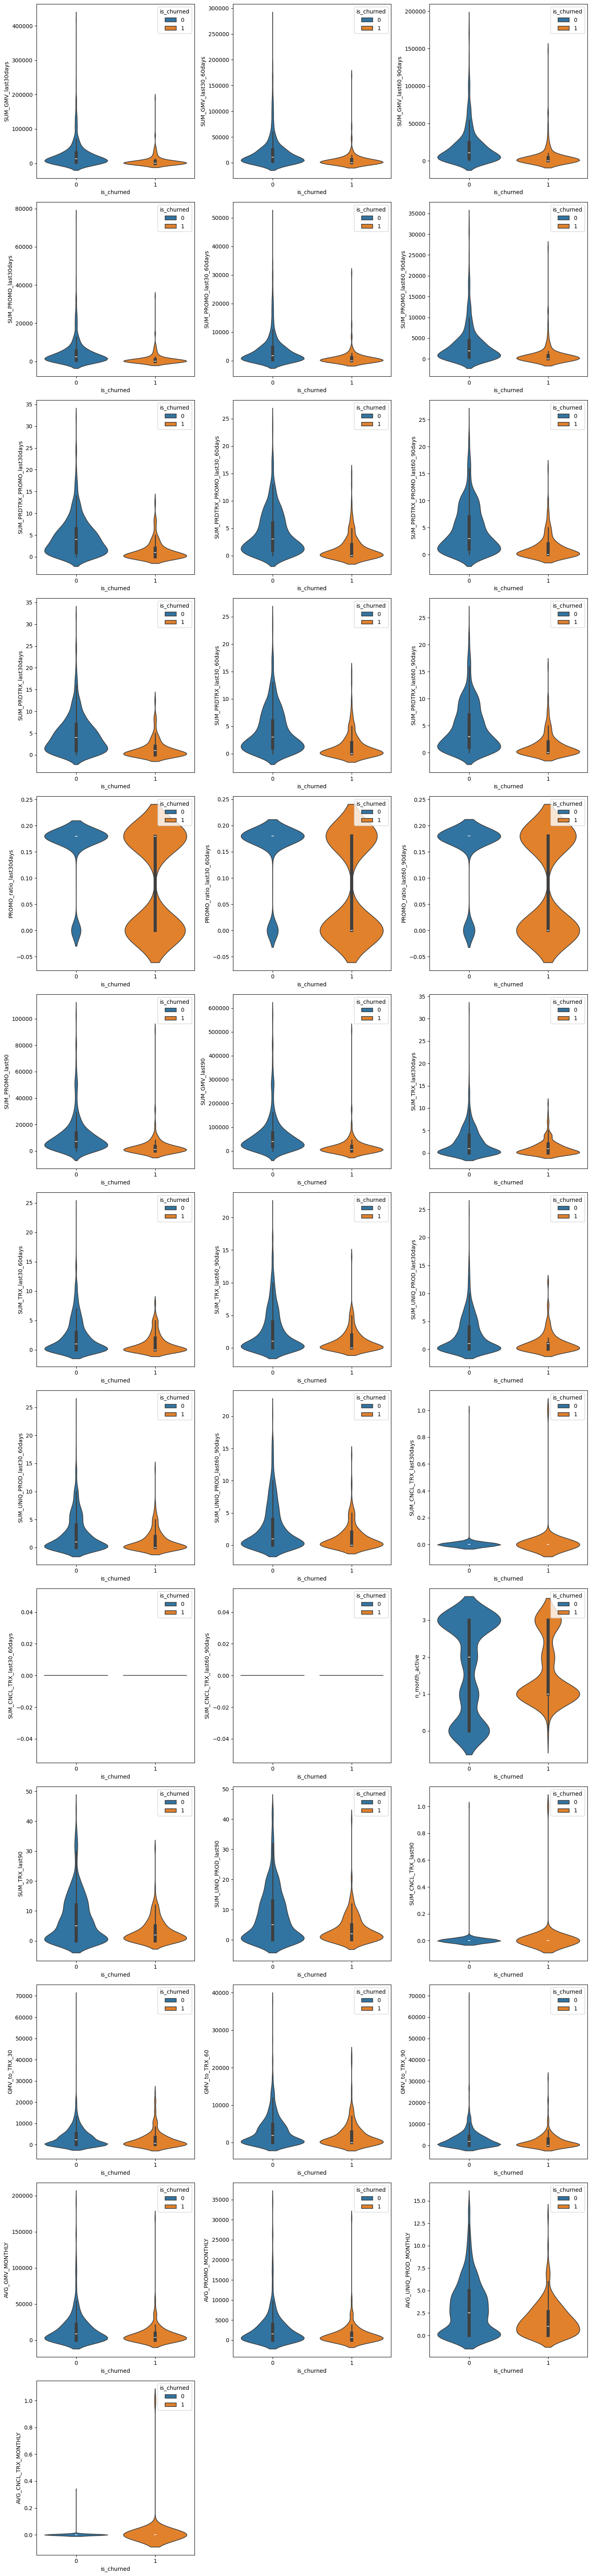

In [21]:
violin_(df,col_numerical,col_target)

Findings reveal clear patterns indicating that customers with
* more transaction
* lower promo to GMV ratio
* lower monthly average cancelled trx
* longer terms
* a diverse range of product purchased
 are less likely to churn. While the plots provide initial insights, it"s noteworthy that they may not be the optimal approach for differentiating churn likelihood.